In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d emmarex/plantdisease

 97% 638M/658M [00:08<00:00, 147MB/s]
100% 658M/658M [00:09<00:00, 76.3MB/s]


In [ ]:
!unzip /content/plantdisease.zip -d /content/plantdisease/

Streaming output truncated to the last 5000 lines.
  inflating: /content/plantdisease/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: /content/plantdisease/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: /content/plantdisease/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: /content/plantdisease/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: /content/plantdisease/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: /content/plantdisease/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf__

In [ ]:
import os
import numpy as np
import shutil
import random
from PIL import Image
import tensorflowjs as tfjs
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [ ]:
base_dir = '/content/plantdisease/PlantVillage'

tomato_bac_spot_dir = os.path.join(base_dir, 'Tomato_Bacterial_spot')
tomato_early_dir = os.path.join(base_dir, 'Tomato_Early_blight')
tomato_late_dir = os.path.join(base_dir, 'Tomato_Late_blight')
tomato_leaf_dir = os.path.join(base_dir, 'Tomato_Leaf_Mold')
tomato_sep_dir = os.path.join(base_dir, 'Tomato_Septoria_leaf_spot')
tomato_spider_spot_dir = os.path.join(base_dir, 'Tomato_Spider_mites_Two_spotted_spider_mite')
tomato_target_spot_dir = os.path.join(base_dir, 'Tomato__Target_Spot')
tomato_yellowleaf_dir = os.path.join(base_dir, 'Tomato__Tomato_YellowLeaf__Curl_Virus')
tomato_mos_dir = os.path.join(base_dir, 'Tomato__Tomato_mosaic_virus')
tomato_healthy_dir = os.path.join(base_dir, 'Tomato_healthy')


In [ ]:
directories = [tomato_bac_spot_dir, tomato_early_dir, tomato_leaf_dir, tomato_sep_dir, tomato_spider_spot_dir,
               tomato_target_spot_dir,tomato_yellowleaf_dir, tomato_mos_dir, tomato_healthy_dir]
file_lists = [[os.path.join(d, f) for f in os.listdir(d)] for d in directories]

for files in file_lists:
    print(len(files))

tomato_bac_spot_files, tomato_early_files, tomato_leaf_files, tomato_sep_files, tomato_spider_spot_files, tomato_target_spot_files,tomato_yellowleaf_files, tomato_mos_files, tomato_healthy_files = file_lists

2127
1000
952
1771
1676
1404
3209
373
1591


In [ ]:
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

train_files = []
val_files = []
test_files = []

for files in file_lists:
    random.shuffle(files)  # Shuffle the files in each directory
    num_train = int(len(files) * train_ratio)
    num_val = int(len(files) * val_ratio)
    
    train_files.append(files[:num_train])
    val_files.append(files[num_train:num_train+num_val])
    test_files.append(files[num_train+num_val:])
    
print(f'Total training files: {sum([len(files) for files in train_files])}')
print(f'Total validation files: {sum([len(files) for files in val_files])}')
print(f'Total test files: {sum([len(files) for files in test_files])}')


Total training files: 9868
Total validation files: 2111
Total test files: 2124


In [ ]:
train_dir = '/content/train'  # path folder baru untuk data train
val_dir = '/content/validation'  # path folder baru untuk data validation
test_dir = '/content/test'  # path folder baru untuk data test

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

for files in train_files:
    label = os.path.basename(os.path.dirname(files[0]))  # ambil nama direktori sebagai label/nama folder
    label_dir = os.path.join(train_dir, label)
    os.makedirs(label_dir, exist_ok=True)
    for file in files:
        shutil.copy2(file, label_dir)

for files in val_files:
    label = os.path.basename(os.path.dirname(files[0]))  # ambil nama direktori sebagai label/nama folder
    label_dir = os.path.join(val_dir, label)
    os.makedirs(label_dir, exist_ok=True)
    for file in files:
        shutil.copy2(file, label_dir)

for files in test_files:
    label = os.path.basename(os.path.dirname(files[0]))  # ambil nama direktori sebagai label/nama folder
    label_dir = os.path.join(test_dir, label)
    os.makedirs(label_dir, exist_ok=True)
    for file in files:
        shutil.copy2(file, label_dir)


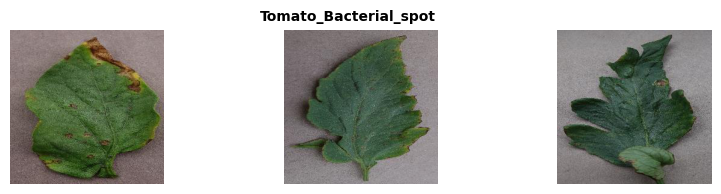

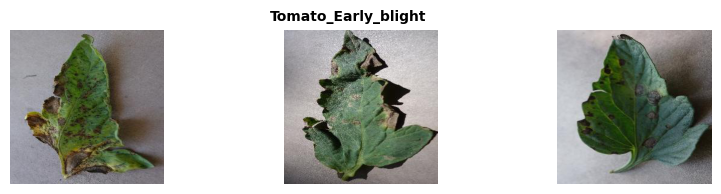

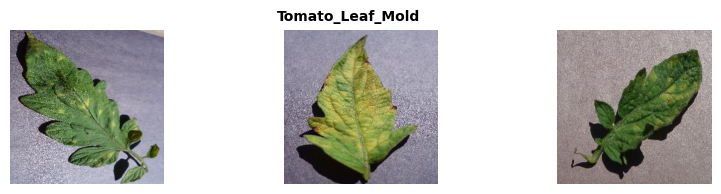

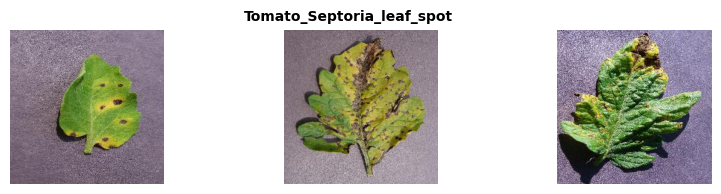

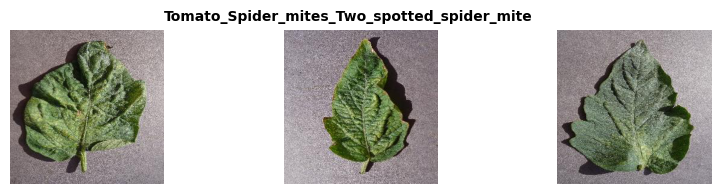

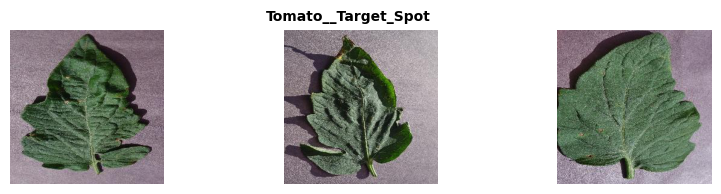

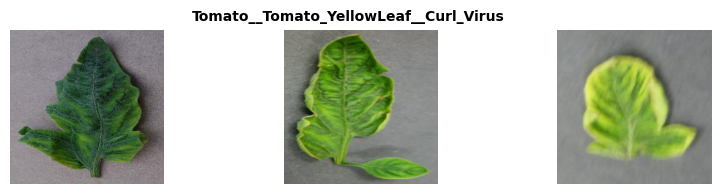

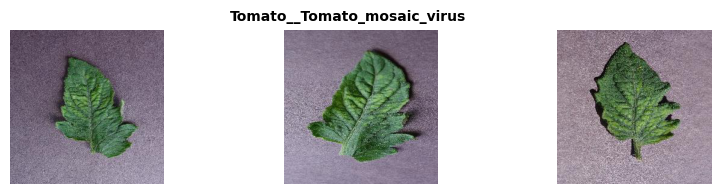

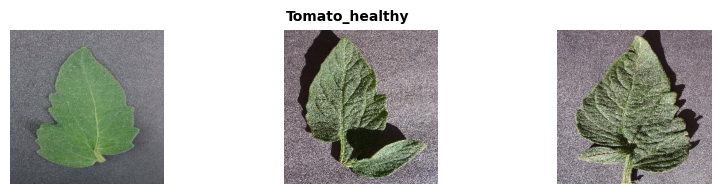

In [ ]:
labels = ['Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Leaf_Mold', 
          'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite',
          'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 
          'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']

def display_images(directory, label, num_images=3):
    plt.figure(figsize=(10,2))
    plt.suptitle(label, fontsize=10, fontweight='bold')
    for i in range(num_images):
        image_path = os.path.join(directory, random.choice(os.listdir(directory)))
        image = plt.imread(image_path)
        plt.subplot(1, num_images, i+1)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

# Display sample images from each directory
for i, directory in enumerate(directories):
    display_images(directory, labels[i])

In [ ]:
#@title
# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Load dataset from directory
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical')

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical')

Found 11278 images belonging to 9 classes.
Found 2824 images belonging to 9 classes.


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

# Load dataset from directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical')


Found 9868 images belonging to 9 classes.
Found 2110 images belonging to 9 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [ ]:
#@title
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model2 = Sequential()
model2.add(conv_base)
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(9, activation='softmax'))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               6422784   
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 9)                 2313      
                                                                 
Total params: 21,139,785
Trainable params: 21,139,785
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint('model.h5', monitor='val_loss',save_weights_only=True,
                             verbose=1, save_best_only=True, mode='auto')

In [ ]:
# Train the model
history = model.fit(train_generator, epochs=15, steps_per_epoch=155, 
                    validation_data = val_generator, verbose = 1, 
                    validation_steps=3, callbacks = [checkpoint])

Epoch 1/15
155/155 [==============================] - ETA: 0s - loss: 1.5530 - accuracy: 0.4442
Epoch 1: val_loss improved from inf to 2.09603, saving model to model.h5
155/155 [==============================] - 148s 860ms/step - loss: 1.5530 - accuracy: 0.4442 - val_loss: 2.0960 - val_accuracy: 0.4740
Epoch 2/15
155/155 [==============================] - ETA: 0s - loss: 0.8839 - accuracy: 0.6865
Epoch 2: val_loss improved from 2.09603 to 0.82739, saving model to model.h5
155/155 [==============================] - 131s 843ms/step - loss: 0.8839 - accuracy: 0.6865 - val_loss: 0.8274 - val_accuracy: 0.6875
Epoch 3/15
155/155 [==============================] - ETA: 0s - loss: 0.6532 - accuracy: 0.7709
Epoch 3: val_loss did not improve from 0.82739
155/155 [==============================] - 131s 842ms/step - loss: 0.6532 - accuracy: 0.7709 - val_loss: 1.2957 - val_accuracy: 0.6562
Epoch 4/15
155/155 [==============================] - ETA: 0s - loss: 0.5642 - accuracy: 0.7979
Epoch 4: val_l

Text(0.5, 1.0, 'Training and validation loss')

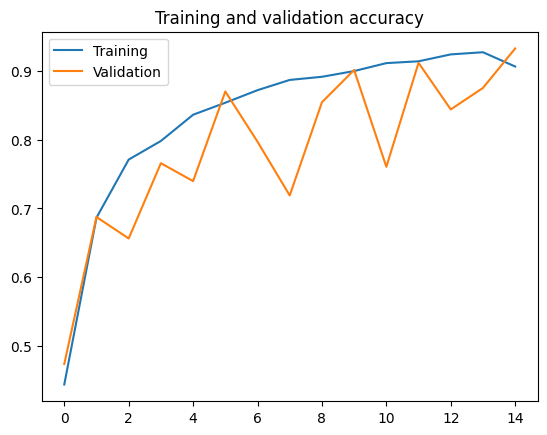

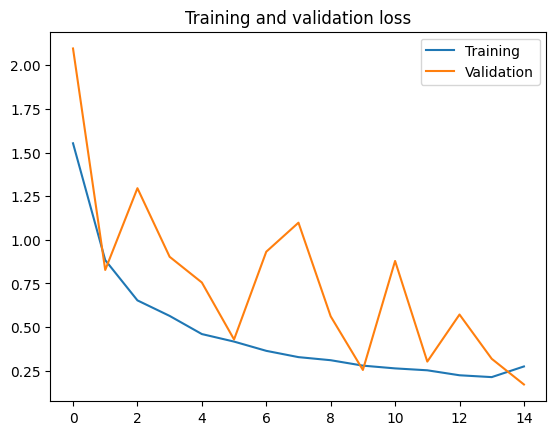

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc, label='Training')
plt.plot  ( epochs, val_acc, label='Validation')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss, label='Training')
plt.plot  ( epochs, val_loss, label='Validation')
plt.legend()
plt.title ('Training and validation loss')

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

Found 2124 images belonging to 9 classes.


34/34 [==============================] - 6s 184ms/step


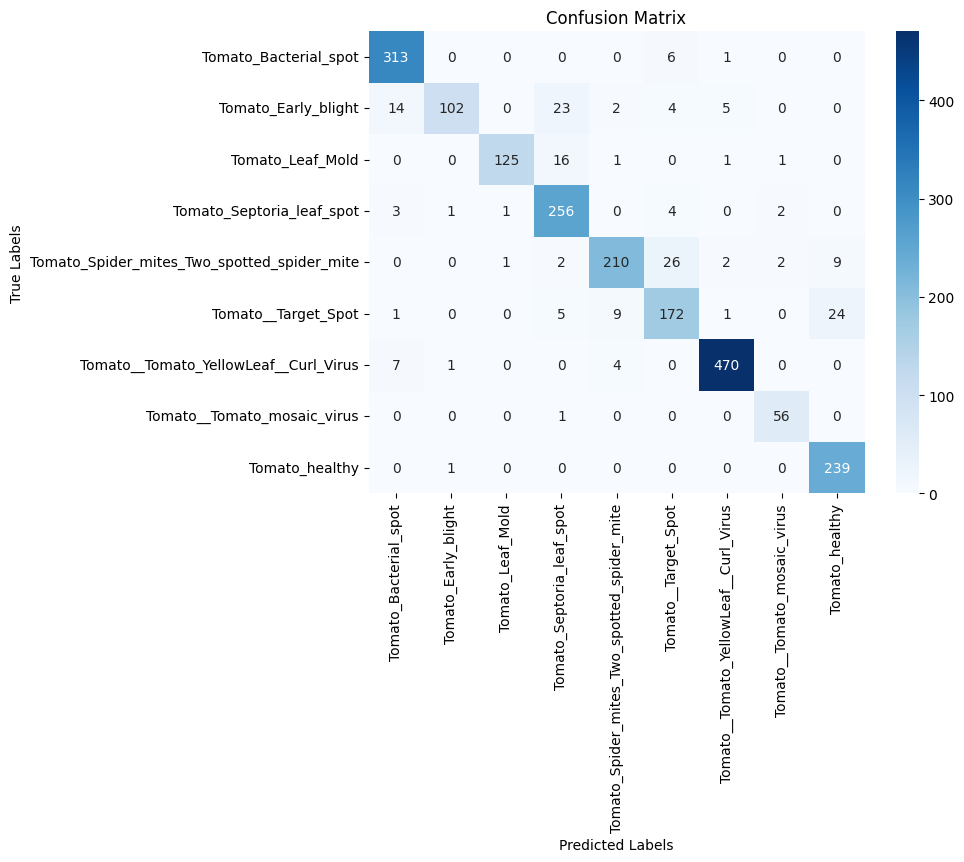

                                             precision    recall  f1-score   support

                      Tomato_Bacterial_spot       0.93      0.98      0.95       320
                        Tomato_Early_blight       0.97      0.68      0.80       150
                           Tomato_Leaf_Mold       0.98      0.87      0.92       144
                  Tomato_Septoria_leaf_spot       0.84      0.96      0.90       267
Tomato_Spider_mites_Two_spotted_spider_mite       0.93      0.83      0.88       252
                        Tomato__Target_Spot       0.81      0.81      0.81       212
      Tomato__Tomato_YellowLeaf__Curl_Virus       0.98      0.98      0.98       482
                Tomato__Tomato_mosaic_virus       0.92      0.98      0.95        57
                             Tomato_healthy       0.88      1.00      0.93       240

                                   accuracy                           0.91      2124
                                  macro avg       0.92      0.9

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Prediksi menggunakan model
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# Ambil label sebenarnya dari generator
y_true = test_generator.classes

# Membuat confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Mendapatkan daftar nama kelas
class_names = list(test_generator.class_indices.keys())

# Membuat plot confusion matrix
plt.figure(figsize=(8, 6), dpi=100)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

# Membuat classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)


In [ ]:
saved_model_path = "/content/model.h5"

model.save(saved_model_path)

In [ ]:
tfjs.__version__

'4.5.0'

In [ ]:
!tensorflowjs_converter --input_format=keras {saved_model_path} ./

2023-05-14 07:09:16.352732: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving 003a5321-0430-42dd-a38d-30ac4563f4ba___Com.G_TgS_FL 8121.jpeg to 003a5321-0430-42dd-a38d-30ac4563f4ba___Com.G_TgS_FL 8121.jpeg


ValueError: ignored

In [ ]:
files.download('model.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('group1-shard1of19.bin')
files.download('group1-shard2of19.bin')
files.download('group1-shard3of19.bin')
files.download('group1-shard4of19.bin')
files.download('group1-shard5of19.bin')
files.download('group1-shard6of19.bin')
files.download('group1-shard7of19.bin')
files.download('group1-shard8of19.bin')
files.download('group1-shard9of19.bin')
files.download('group1-shard10of19.bin')
files.download('group1-shard11of19.bin')
files.download('group1-shard12f19.bin')
files.download('group1-shard13f19.bin')
files.download('group1-shard14of19.bin')
files.download('group1-shard15of19.bin')
files.download('group1-shard16of19.bin')
files.download('group1-shard17f19.bin')
files.download('group1-shard18f19.bin')
files.download('group1-shard19f19.bin')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

FileNotFoundError: ignored

In [ ]:
files.download('group1-shard11of19.bin')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('group1-shard12of19.bin')
files.download('group1-shard13of19.bin')
files.download('group1-shard14of19.bin')
files.download('group1-shard15of19.bin')
files.download('group1-shard16of19.bin')
files.download('group1-shard17of19.bin')
files.download('group1-shard18of19.bin')
files.download('group1-shard19of19.bin')

In [ ]:
files.download('/content/test/Tomato_Bacterial_spot/00639d29-2d1a-4fcf-9bd3-a2b3109c74c4___UF.GRC_BS_Lab Leaf 1054.JPG')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('/content/test/Tomato_healthy/01700b46-3800-46c6-ab81-09a5f50af525___RS_HL 0108.JPG')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>